# Cluster countries

Import the required modules.

In [1]:
import bokeh as bk
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool, PanTool, ResetTool, BoxZoomTool
import numpy as np
import pandas as pd
from sklearn.base import TransformerMixin
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
output_notebook()

Loading BokehJS ...

## Import data

In [2]:
data_2015 = pd.read_csv('Data/world_happiness_2015.csv')

In [3]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Umap

For the Umap we will use only the numerical columns of the countries data frame, meaning "happines score, Standard Error, GDP, Life expectancy, Corruption, Generosity and Dystopia residual.

The plots below shows both the distribution of the happines score  and  tha pair plots for the numerical variables, I added a new variable for the classification of the countries according to three groups, either  Very happy, normal or not happy. We see that most conuntries are in the middle category. 

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

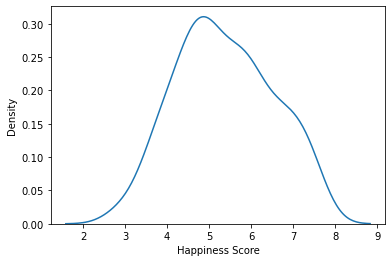

In [21]:

sns.kdeplot(data_2015['Happiness Score'])

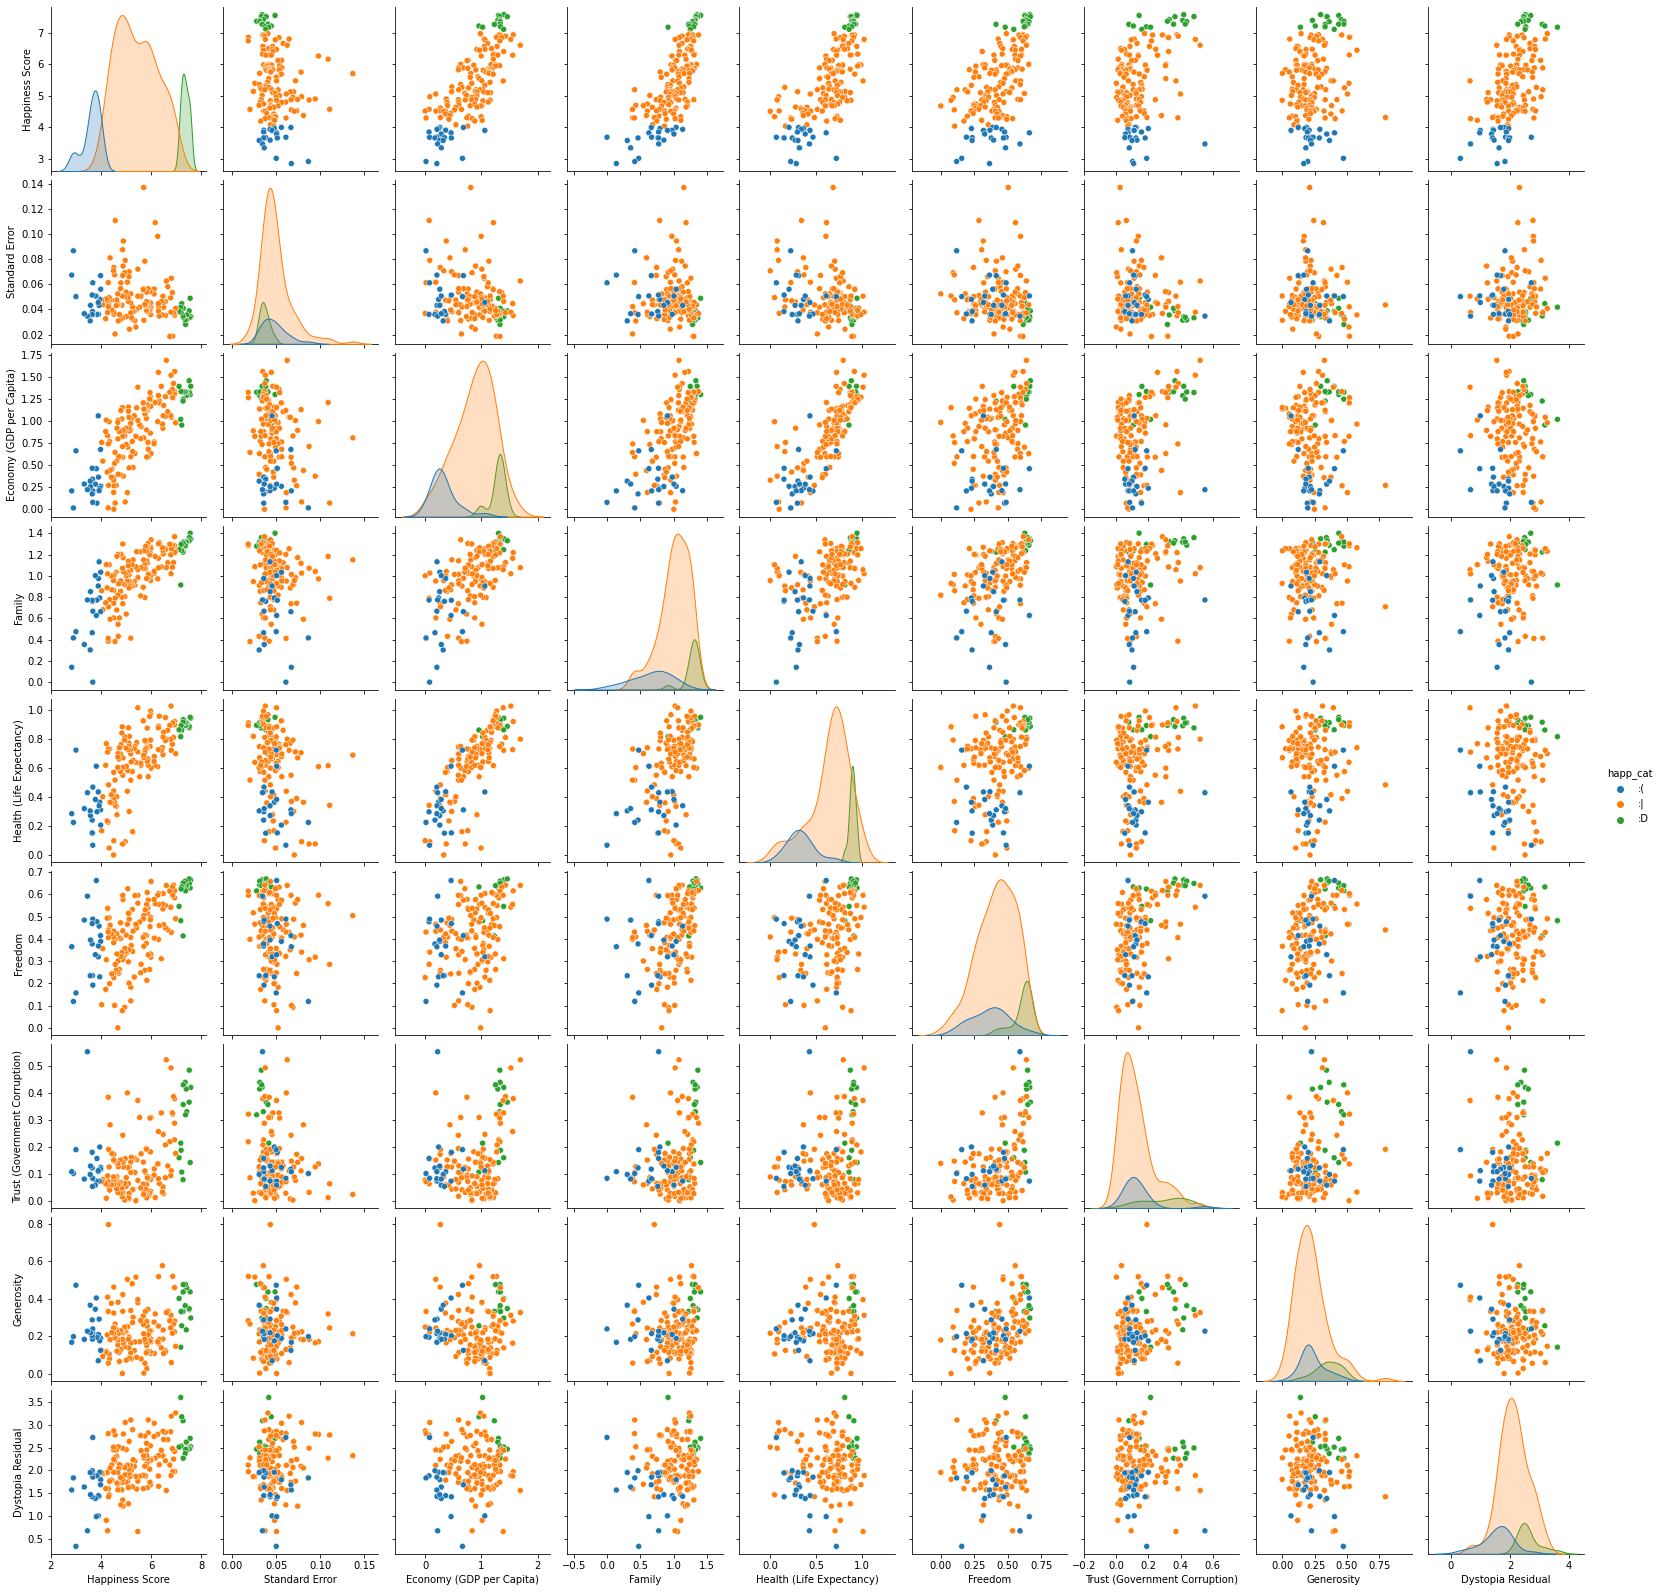

In [26]:
import umap 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
data_2015['happ_cat']=pd.cut(data_2015['Happiness Score'],
                                      bins=[0.0, 4.0, 7.0, 10.0],
                                      labels=[':(', ':|', ':D'])
sns.pairplot(data_2015.drop(["Region", "Happiness Rank"], axis=1), hue='happ_cat')

In [98]:
#extract data un column form
data_countries=data_2015[ ['Happiness Score','Standard Error',
                          'Economy (GDP per Capita)', 'Family',
                          'Health (Life Expectancy)', 'Freedom',
                          'Trust (Government Corruption)', 
                          'Generosity', 'Dystopia Residual']].values
scale_country_data = StandardScaler().fit_transform(data_countries)         # scale data

# define a function to plot results of umap easily
def scatter_umap(n_neighbors=15, min_dist=0.1,metric='euclidean', title=''):
    '''Fit a UMAP with the specified arguments to the country data and plot the results. '''
    reducer= umap.UMAP(n_neighbors=n_neighbors,
                    min_dist=min_dist,
                    metric=metric
                    )
    embedding=reducer.fit_transform(scale_country_data)
    plt.scatter(embedding[:,0], embedding[:,1], c=[sns.color_palette()[val] for val in [{":D":1, ":|":2, ":(":3}[x] for x in data_2015.happ_cat]], 
                s=50)
    plt.title(title)
    plt.show()


First we will vary the number of neighbours attribute this attribute controls how fine is the final agregation. Lower values produce embedding in which the data is agregated on smaller thus better capturing fine and local structures of the dataset. With larger values the agregation tries to find more general patterns. We can see that for the country data the umap with 10 neighbours produced for example a small cluster of agregated data to the top left of the scatter plot, this isolated patchs disspears when using a larger number of neighbours. 

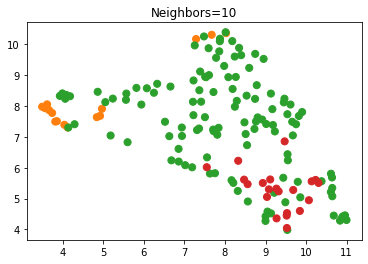

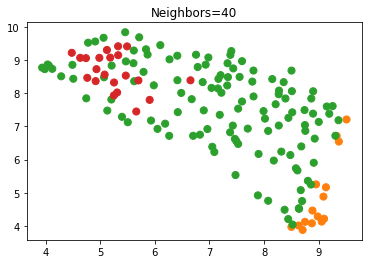

In [99]:
scatter_umap(10,0.1,'euclidean',  title='Neighbors=10')
scatter_umap(40,0.1,'euclidean',  title='Neighbors=40')


likewise if we vary the minimun distance controls the "level of clustering of the final embedding, larger values produce mappings with small groups while the larger values tend to joing al the observation under single big cluster

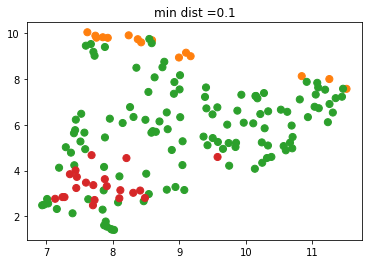

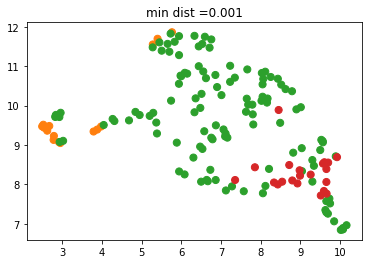

In [100]:
scatter_umap(10,0.1,'euclidean',  title='min dist =0.1')
scatter_umap(10,0.001,'euclidean',  title='min dist =0.001')

Finally the distance metric controls for which distance metric is used, this changes completely the generated embedding for exmaple when comparing euclidean with manhattan distance we obtain the following graphs. The separation for the mahalanobis distance is not as good. I suspect that this is caused by the fact that mahalonibis distance takes into account the correlation of the input variables while in euclidean distance this is not taken into account.

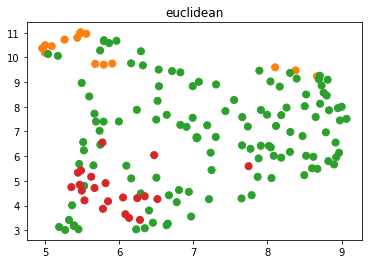

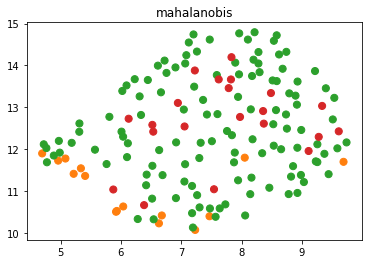

In [101]:
scatter_umap(10,0.1,'euclidean',  title='euclidean')
scatter_umap(10,0.1,'mahalanobis',  title='mahalanobis')